In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
spring_weather = pd.read_csv("spring-2024-weather.csv")
summer_weather = pd.read_csv("summer-2024-weather.csv")
fall_weather = pd.read_csv("fall-2024-weather.csv")
winter_weather = pd.read_csv("winter-2025-weather.csv")

spring_aqi = pd.read_csv("spring-2024-aqi.csv")
summer_aqi = pd.read_csv("summer-2024-aqi.csv")
fall_aqi = pd.read_csv("fall-2024-aqi.csv")
winter_aqi = pd.read_csv("winter-2025-aqi.csv")

weather = pd.concat([spring_weather, summer_weather, fall_weather, winter_weather], ignore_index = True)
aqi = pd.concat([spring_aqi, summer_aqi, fall_aqi, winter_aqi], ignore_index = True)

df = pd.merge(weather, aqi, on = 'date', how = 'inner')

In [4]:
df["date"] = pd.to_datetime(df["date"])

df["date"] = df["date"].dt.floor("D")
daily_df = df.groupby("date").agg({
    "temperature_2m": "mean",
    "precipitation": "sum",
    "relative_humidity_2m": "mean",
    "cloud_cover": "mean",
    "pm10": "mean",
    "pm2_5": "mean",
    "carbon_monoxide": "mean"
}).reset_index()

In [5]:
daily_df = daily_df.drop(columns=["pm10", "carbon_monoxide"])

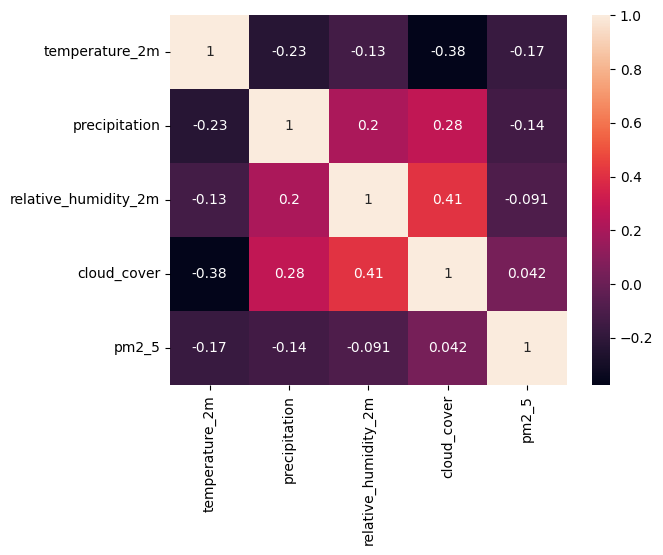

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = daily_df.select_dtypes(include=["number"])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True)
plt.savefig("Heatmap.png")
plt.show()

In [8]:
print(daily_df.dtypes)

date                    datetime64[ns, UTC]
temperature_2m                      float64
precipitation                       float64
relative_humidity_2m                float64
cloud_cover                         float64
pm2_5                               float64
dtype: object


In [5]:
features = ["temperature_2m", "precipitation", "relative_humidity_2m", "cloud_cover"]
X = df[features]
y = df["pm2_5"]

In [6]:
split_date = df["date"].quantile(0.8)
X_train = X[df["date"] < split_date]
X_test = X[df["date"] >= split_date]
y_train = y[df["date"] < split_date]
y_test = y[df["date"] >= split_date]

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
import pickle

with open('rf_pm25_model.pkl', 'wb') as f:
    pickle.dump(model, f)

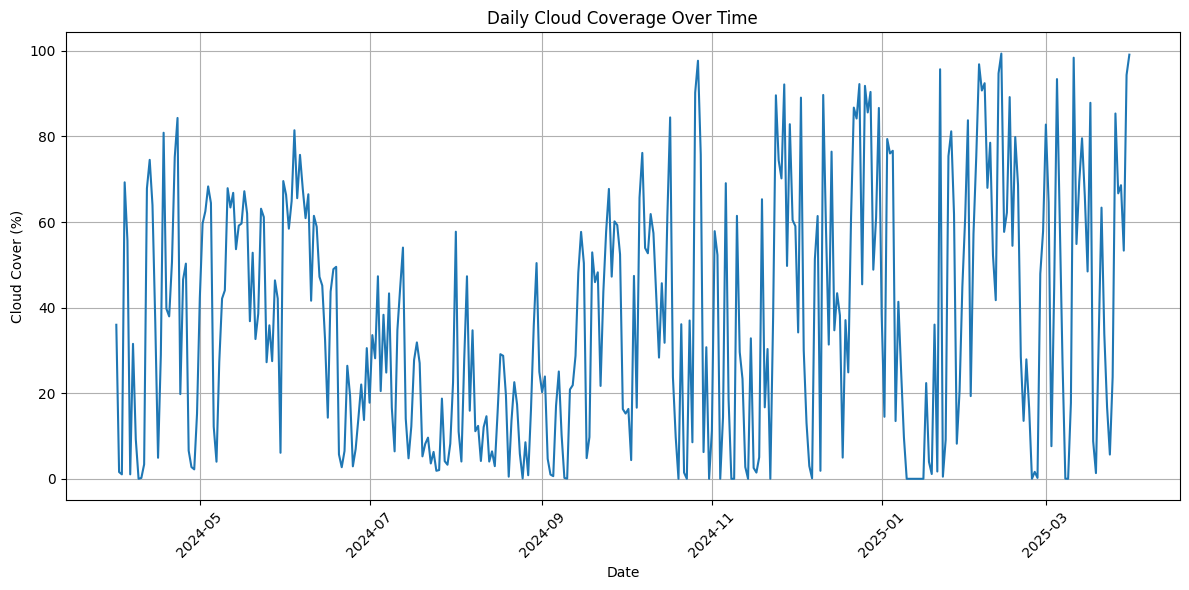

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_df["date"], daily_df["cloud_cover"], linestyle='-')
plt.title("Daily Cloud Coverage Over Time")
plt.xlabel("Date")
plt.ylabel("Cloud Cover (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
daily_df.describe()

,temperature_2m,precipitation,relative_humidity_2m,cloud_cover,pm2_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,16.579172,0.601644,66.773052,37.324772,21.579555
std,4.275017,2.975910,18.872000,28.627434,13.476347
min,8.067916,0.000000,7.620384,0.000000,4.754167
25%,13.345000,0.000000,60.081418,10.250000,13.770833
50%,15.799166,0.000000,73.363189,34.208333,18.379167
75%,19.884583,0.000000,79.439220,60.875000,26.404167
max,33.245000,29.800000,93.885696,99.375000,141.733333
